## Probelma 2

Este bloque de código realiza simulaciones y visualizaciones relacionadas con la desigualdad de Dvoretzky-Kiefer-Wolfowitz.

ECDF for max(datos): 0.9 


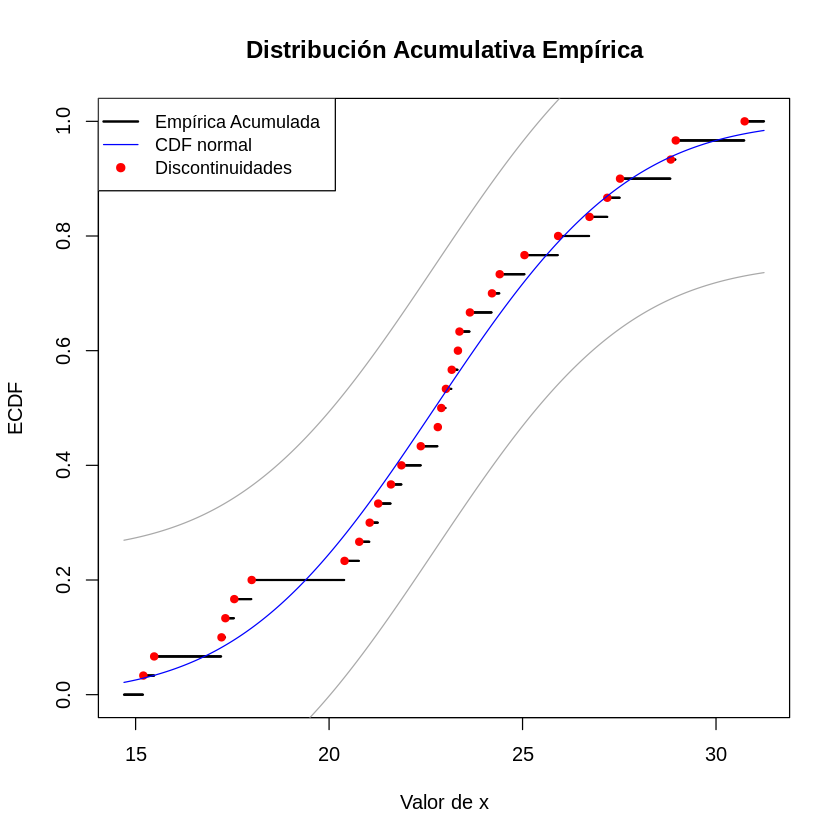

In [1]:
custom_ecdf <- function(x, datos)
{
  e_cdf <- sum(datos <= x) / length(datos)
  return(e_cdf)
}

datos <- c(23.37, 21.87, 24.41, 21.27, 23.33, 15.20, 24.21, 27.52, 15.48, 27.19,
           25.05, 20.40, 21.05, 28.83, 22.90, 18.00, 17.55, 25.92, 23.64, 28.96,
           23.02, 17.32, 30.74, 26.73, 17.22, 22.81, 20.78, 23.17, 21.60, 22.37)

x_bar <- mean(datos)
s <- sd(datos)

datosOrdenados <- sort(datos)

ecdf_valor <- custom_ecdf(28, datos)
cat("ECDF for max(datos):", ecdf_valor, "\n")

rango <- seq(min(datos)-0.5,max(datos)+0.5,0.01)

valores_ECDF <- sapply(rango, function(x) custom_ecdf(x, datos))

plot(rango, valores_ECDF, type = 'p', xlab = 'Valor de x', ylab = 'ECDF', pch = 19,
     main = 'Distribución Acumulativa Empírica', cex = 0.1)

discontinuidades <- unique(datosOrdenados)
discontinuidades_ecdf <- sapply(discontinuidades, function(x) custom_ecdf(x, datos))

points(discontinuidades, discontinuidades_ecdf,
       pch = 19, col = "red", cex = 0.8)

normal_P <- pnorm(rango, mean = x_bar, sd = s)

lines(rango,normal_P, col = "blue") #CDF Normal, predicción

legend("topleft", legend = c("Empírica Acumulada", "CDF normal", "Discontinuidades"),
       col = c("black", "blue", "red"), pch = c(NA, NA, 19), lty = c(1, 1, 0),
       cex = c(0.9,0.9,0.9), lwd = c(2,1,1))


alpha <- 0.05
n <- length(datos)
D <- sqrt(-log(alpha / 2) / (2 * n))


l_band <- normal_P - D
u_band <- normal_P + D

lines(rango,l_band, col = "darkgrey")
lines(rango,u_band, col = "darkgrey")
